In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Showing different fields values

Gender values

In [8]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

Different 'Multiple Lines' values

In [9]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

Different 'Internet Service' values

In [10]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Different "OnlineSecurity" values

In [11]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Different "OnlineBackup" values

In [12]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

DeviceProtection values

In [13]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

TechSupport values

In [14]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

StreamingTV values

In [15]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

StreamingMovies values

In [16]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Contract values

In [17]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

PaymentMethod values

In [18]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

The provided dataset includes 7044 entries.
For each entry, we have 21 attributes: most of them are categorical.
Each entry represents a Telco customer. Each customer is described by:
    - customerID: a string field which uniquely represent a single customer;
    - gender: a categorical field representing the customer sex: 'Male' or 'Female';
    - SeniorCitizen: categorical binary attribute. It assumes 1 if the client is senior, 0 otherwise;
    - Partner: binary attributes that indicates whether the customer has a partner or not ('Yes' or 'No');
    - Dependents: whether the customer has dependents or not ('Yes' or 'No');
    - tenure: discrete numerical field representing the number of months the customer has stayed with the company;
    - PhoneService: categorical attributes that indicates whether the customer subscribed a phone service or not ('Yes or 'No');
    - MultipleLines: categorical attributes indicating whether the customer has multiple lines or not: it can assume 'Yes', 'No' or 'No phone service');
    - InternetService: categorical attribute which represents the Customer’s internet service provider: different values are 'DSL', 'Fiber optic' and 'No';
    - OnlineSecurity: categorical field that indicates whether the customer has online security or not: 'No', 'Yes' or 'No internet service';
    - OnlineBackup: whether the customer has online backup or not ('Yes', 'No' or 'No internet service');
    - DeviceProtection: whether the customer has device protection or not ('No', 'Yes' or 'No internet service');
    - TechSupport: whether the customer has tech support or not ('No', 'Yes', 'No internet service');
    - StreamingTV: whether the customer has streaming TV or not ('No', 'Yes' or 'No internet service');
    - StreamingMovies: whether the customer has streaming movies or not ('Yes', 'No', 'No internet service');
    - Contract: the contract term of the customer ('Month-to-month', 'One year', 'Two year');
    - PaperlessBilling: whether the customer has paperless billing or not ('Yes', 'No');
    - PaymentMethod: categorical fields that represent the customer payment method: 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)';
    - MonthlyCharges: numerical fields that indicates the amount charged to the customer monthly;
    - TotalCharges: total amount charged to the customer (numerical).

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
df = df.drop(['customerID'], axis=1)

In [21]:
df1=df.drop('SeniorCitizen',axis=1)
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


actualCharge represents the current charge / total charge ratio.
If the current charge is lower than the previous one, the ratio is <1

In [22]:
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [23]:
a, ranges=np.histogram(df['tenure'],bins='sturges')
ranges[-1]=ranges[-1]+1
ranges=ranges.astype(int)

In [24]:
df.groupby(pd.cut(df['tenure'], ranges,right=False)).count()['tenure']

tenure
[0, 5)      1238
[5, 10)      616
[10, 15)     517
[15, 20)     436
[20, 25)     403
[25, 30)     359
[30, 36)     423
[36, 41)     294
[41, 46)     312
[46, 51)     340
[51, 56)     350
[56, 61)     348
[61, 66)     374
[66, 73)    1033
Name: tenure, dtype: int64

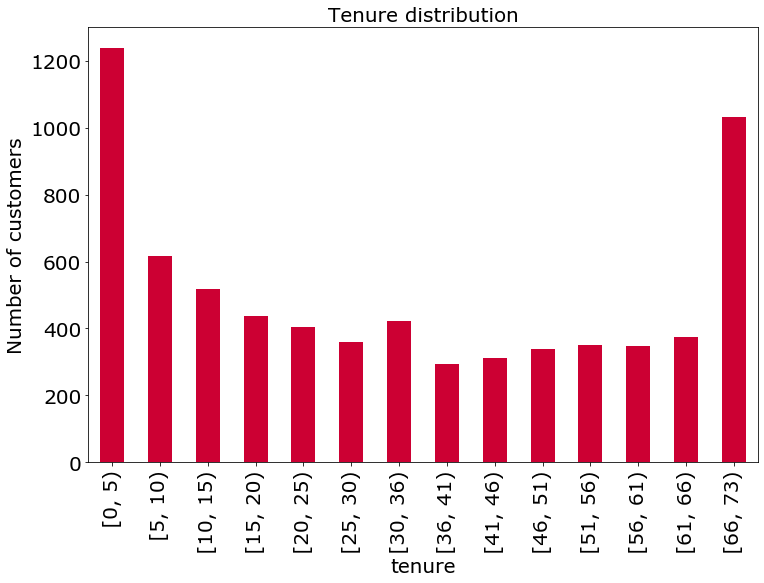

In [25]:
df.groupby(pd.cut(df['tenure'], ranges,right=False)).count()['tenure'].plot(kind='bar',color='#CC0033',figsize=(12,8),fontsize=20)
plt.ylabel('Number of customers',fontsize=20)
plt.xlabel('tenure',fontsize=20)
plt.title('Tenure distribution', fontsize=20)
plt.savefig('age_old.png')
plt.show()

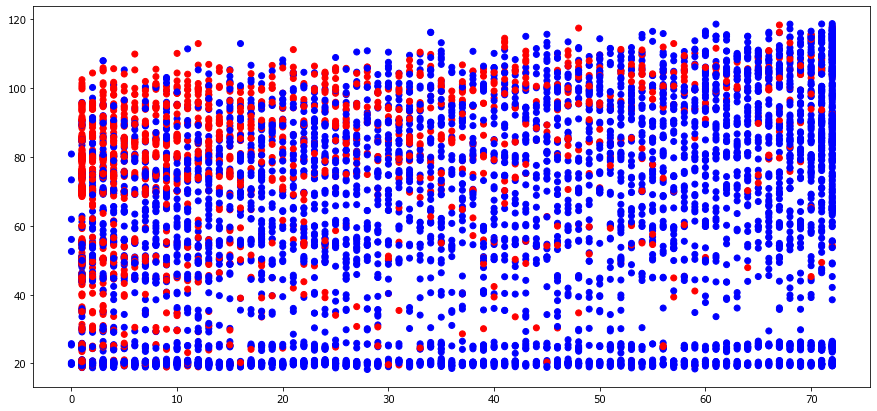

In [26]:
df['color'] = np.where(df['Churn']=='No', 'blue', 'red')

plt.figure(figsize=(15,7))
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['color'])

In [27]:
pd.DataFrame(np.isnan(df.TotalCharges.values)).count()

0    7043
dtype: int64

In [28]:
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,color
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,blue
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,blue
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,blue
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,blue
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,blue
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,blue
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,blue
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,blue
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,blue
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,blue


There are 11 missing values in Total charges values. 

In [29]:
df.TotalCharges = df.TotalCharges.interpolate('linear')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [32]:
df['ServiceCount'] = 0

df['ServiceCount'] = np.where(df['OnlineBackup']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])
df['ServiceCount'] = np.where(df['OnlineSecurity']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])
df['ServiceCount'] = np.where(df['DeviceProtection']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])
df['ServiceCount'] = np.where(df['TechSupport']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])
df['ServiceCount'] = np.where(df['StreamingTV']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])
df['ServiceCount'] = np.where(df['StreamingMovies']=='Yes', df['ServiceCount'] +1 , df['ServiceCount'])

In [33]:
df.to_csv('./datasets/step1_output.csv', index=False)

In [34]:
df.ServiceCount.unique()

array([1, 2, 3, 0, 4, 5, 6], dtype=int64)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,color,ServiceCount
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,blue,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,blue,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,red,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,blue,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,red,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [37]:
df[df.tenure*df.MonthlyCharges==df.TotalCharges]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,color,ServiceCount
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,blue,1
20,Male,1,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,red,2
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,red,0
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,red,1
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,blue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Male,0,No,Yes,1,No,No phone service,DSL,No,No,...,No,No,Month-to-month,No,Mailed check,24.20,24.20,No,blue,0
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes,red,0
7016,Female,0,No,No,1,Yes,No,DSL,No,Yes,...,No,No,Month-to-month,No,Electronic check,49.95,49.95,No,blue,1
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,red,0
